<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Steady multi-layer analytic element modeling with TimML
*Mark Bakker*

### Exercise 1. Wells in uniform flow
Consider a confined aquifer with a base at $z=-20$, a top at $z=0$, and a hydraulic conductivity of $k=20$ m/d. At first, flow in the aquifer can be considered as uniform in the Eastern direction. The head drop is 2 m per 1000 m. The head is fixed to $h=20$ m at $x=1000$ m, $y=0$ m.

#### Exercise 1a
Build a TimML model and compute the head at $x=0$, $y=0$. 

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from timml import *

In [2]:
ml_1a = ModelMaq(kaq= 20, z=[0,-20])
uf_1a = Uflow(ml_1a, 2.0/1000, 0)
rf_1a = Constant(ml_1a, xr= 1000, yr = 0, hr=20)
ml_1a.solve()

Number of elements, Number of equations: 2 , 1
..
solution complete


In [3]:
print('The head at (0,0) is %.2f meters'%(ml_1a.head(0,0)))

The head at (0,0) is 22.00 meters


#### Exercise 1b
Add a well at $(x,y)=(0,0)$. The head at the well is 18 m. Compute and report the discharge of the well and make a contour plot of the head with steps of 0.2 m in the window from $(x,y)=(-1000, -1000)$ to $(x,y)=(1000,1000)$. Label the contours.

Number of elements, Number of equations: 3 , 2
...
solution complete
Discharge at the well is 1091.45 m^3/d


<IPython.core.display.Javascript object>


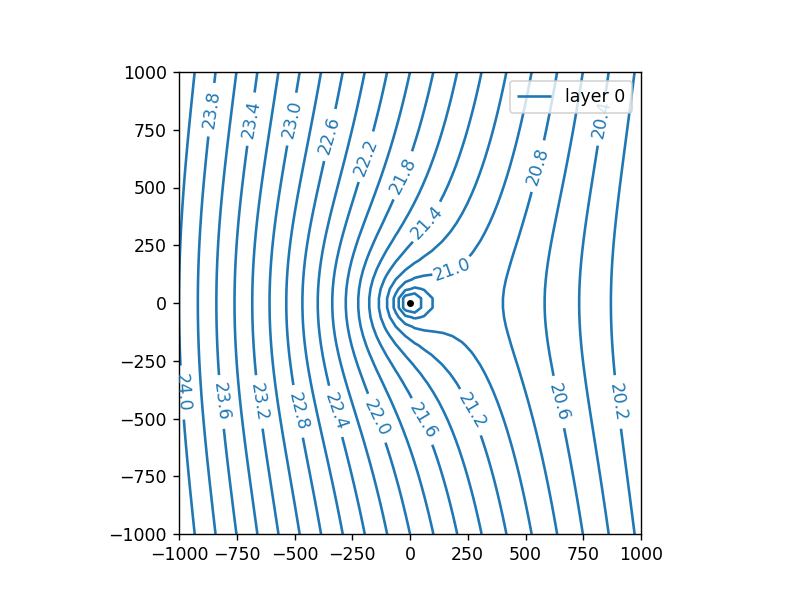

In [17]:
ml_1b = ModelMaq(kaq= 20, z=[0,-20])
uf_1b = Uflow(ml_1b, 2.0/1000, 0)
rf_1b = Constant(ml_1b, xr= 1000, yr = 0, hr=20)
wl_1b = HeadWell(ml_1b,hw = 18)
ml_1b.solve()
print("Discharge at the well is %.2f m^3/d"%(wl_1b.discharge()))
ml_1b.contour(win=[-1000, 1000, -1000, 1000], ngr=50,   ###label=true,decimals=1
              levels=np.arange(18.0, 30.1, 0.2), labels=True, decimals=1)

#### Exercise 1c. 
The total demand for water is 3000 m$^3$/d. Use three wells along the line $x=0$. The three head at each of the three wells is 18 m and the total discharge must be at least 3000 m$^3$/d and not more than 3500 m$^3$/d. Report and print to the screen the total discharge of the three wells combined. Make a contour plot of the head and add the 10-year capture zone of each well. The porosity of the aquifer is 0.35. 

Total discharge satisfies the demand as long as the vertical coordinate of the well is beyond 700 meters
Number of elements, Number of equations: 5 , 4
.....
solution complete
The total discharge is [ 3059.01069432] m^3/d


<IPython.core.display.Javascript object>


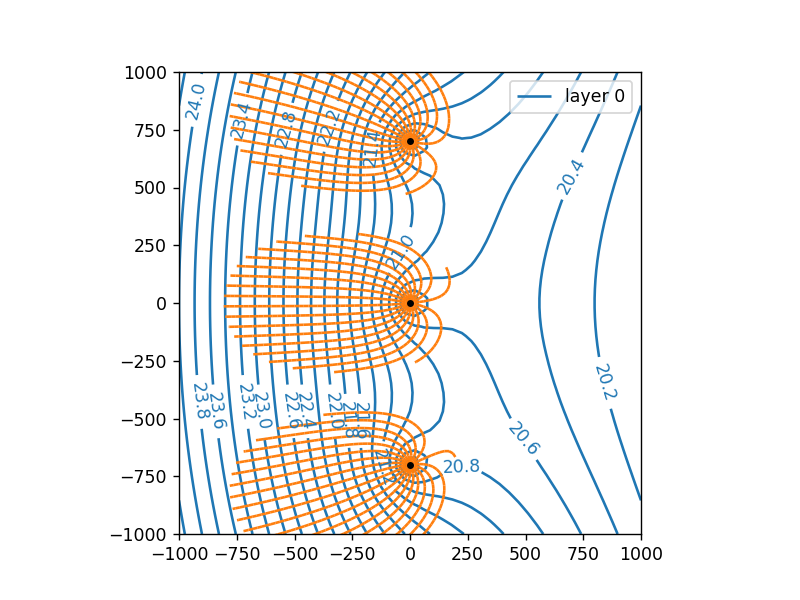

............................................................

In [5]:

Y = np.arange(100,10000,100)
dis = []
vert = []
for y in Y:
    ml_1c = ModelMaq(kaq= 20, z=[0,-20], npor = 0.35)
    uf_1c = Uflow(ml_1c, 2.0/1000, 0)
    rf_1c = Constant(ml_1c, xr= 1000, yr = 0, hr=20)
    w1 = HeadWell(ml_1c,xw=0, yw = -y, hw= 18)
    w2 = HeadWell(ml_1c,xw=0, yw = 0, hw= 18)
    w3 = HeadWell(ml_1c,xw=0, yw = y, hw= 18)
    ml_1c.solve(silent=True)
    discharge = w1.discharge() + w2.discharge() + w3.discharge()
    if discharge>3000 and discharge<3500:
        dis.append(discharge)
        vert.append(y)
print('Total discharge satisfies the demand as long as the vertical coordinate of the well is beyond %s meters'%(vert[0]))


ml_1c = ModelMaq(kaq= 20, z=[0,-20], npor = 0.35)
uf_1c = Uflow(ml_1c, 2.0/1000, 0)
rf_1c = Constant(ml_1c, xr= 1000, yr = 0, hr=20)
w1 = HeadWell(ml_1c,xw=0, yw = -vert[0], hw= 18)
w2 = HeadWell(ml_1c,xw=0, yw = 0, hw= 18)
w3 = HeadWell(ml_1c,xw=0, yw = vert[0], hw= 18)
ml_1c.solve(silent=False)
print('The total discharge is %s m^3/d'%(dis[0]))
ml_1c.contour(win=[-1000, 1000, -1000, 1000], ngr=50,   ###label=true,decimals=1
              levels=np.arange(18.0, 25, 0.2), labels=True, decimals=1)
w1.plotcapzone(nt=20, color='C1', tmax=10 * 365)
w2.plotcapzone(nt=20, color='C1', tmax=10 * 365)
w3.plotcapzone(nt=20, color='C1', tmax=10 * 365)

#### Exercise 1d. 
It turns out that below the aquifer are a clay layer and another aquifer that were neglected so far. The clay layer is 2 m thick and has a hydraulic conductivity of 0.001 m/d. The aquifer below the clay layer is 20 m thick and has a hydraulic conductivity of 20 m/d. Using your design of the previous exercise, what is the combined discharge of the three wells when the aquifer below is taken into account. Does the total discharge go up or down?

In [6]:
ml_1d = ModelMaq(kaq= [20,20], z=[0,-20,-25,-45],c=[2.0/0.001], npor = 0.35)
uf_1d = Uflow(ml_1d, 2.0/1000, 0)
rf_1d = Constant(ml_1d, xr=1000, yr=0, hr=20, layer=0)
w1_1d = HeadWell(ml_1d, xw=0, yw = -vert[0], hw= 18)
w2_1d = HeadWell(ml_1d, xw=0, yw = 0, hw= 18)
w3_1d = HeadWell(ml_1d, xw=0, yw = vert[0], hw= 18)
ml_1d.solve()
discharge = w1_1d.discharge() + w2_1d.discharge() + w3_1d.discharge()
print('The total discharge is %.2f m^3/d'%(discharge[0]), '\n''It goes up comparing to one layer because of vertical flow')

Number of elements, Number of equations: 5 , 4
.....
solution complete
The total discharge is 3203.67 m^3/d 
It goes up comparing to one layer because of vertical flow


### Exercise 2. A well in a semi-confined aquifer
Consider a semi-confined aquifer. The aquifer is 20 m thick and has a hydraulic conductivity of 20 m/d. The semi-confining clay layer has a resistance of $c=1000$ d. The head above the clay layer is fixed to $h=0$ m. A well is located at $(x,y)=(0,0)$, has a discharge of 1000 m$^3$/d, and a radius of 0.3 m. 

#### Exercise 2a. 
Make a TimML model. Compute the leakage factor manually and make sure the leakage factor computed by TimML is the same. Make a plot for head vs. distance from the well for at least $3\lambda$.

The leakage factor of manual calculation is 894.43, and for the model is 632.46


<IPython.core.display.Javascript object>


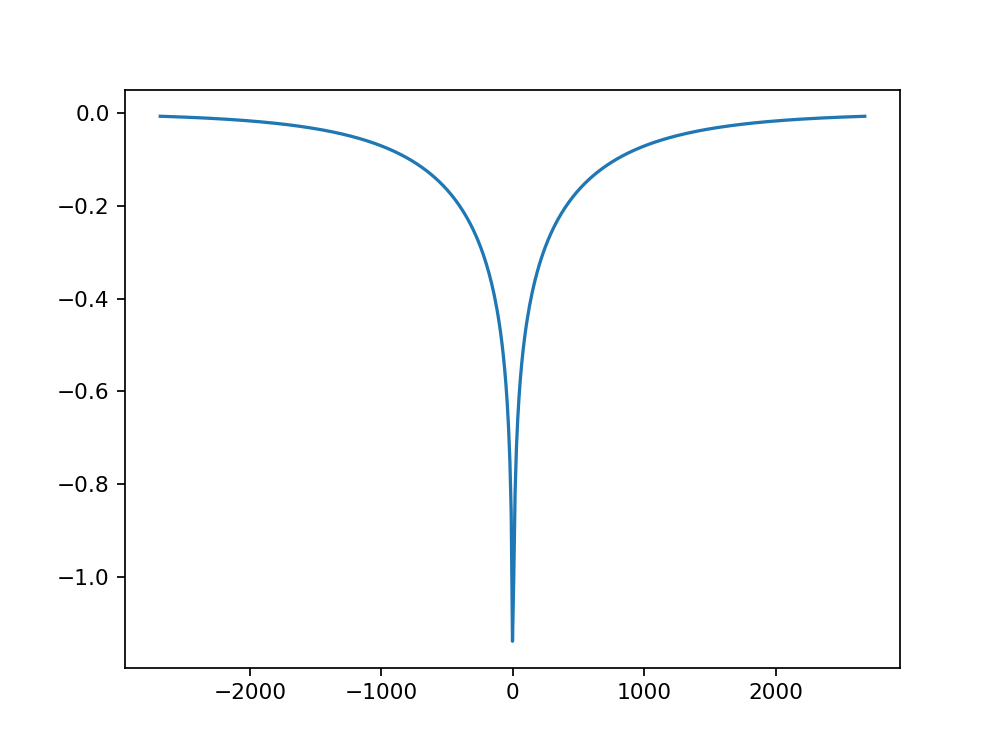

In [3]:
# manually calculate leakage factor
Q = 1000
rw = 0.3
c = 1000
k = 20
H = 20
lamb_m = np.sqrt(c*k*H)
ml_2a = ModelMaq(kaq= 20, z=[1,0,-20],c=1000,Saq=0.1,topboundary='semi', hstar=0 )
well_2a = Well(ml_2a,xw=0,yw=0,layers =0,Qw = 1000, rw =0.3)
ml_2a.solve()
print('The leakage factor of manual calculation is %.2f, and for the model is %.2f'%(ml_2a.aq.lab, lamb_m))
distance = np.arange(-3*ml_2a.aq.lab,3*ml_2a.aq.lab,10)

head = ml_2a.headalongline(distance,0)

plt.figure()
plt.plot(distance,head[0])

#### Exercise 2b. 
The value of the hydraulic conductivity is uncertain and could be anywhere between 10 m/d and 40 m/d. Make a plot with the head at the well along the vertical axis and the hydraulic conductivity of the aquifer along the horizontal axis. Why is the relationship not linear?

<IPython.core.display.Javascript object>


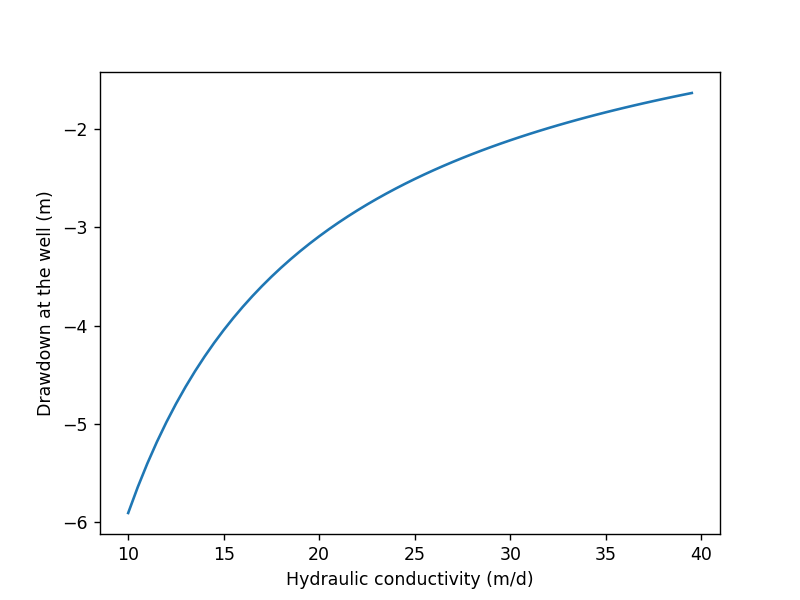

According to defination, Head at the well is propotional to the inverse of hydraulic conductivity.  Hence it should behave like a parabolic curve


In [8]:
k = np.arange(10,40,0.5)
head_atwell=[]
for kaq in k:
    ml_2b = ModelMaq(kaq = kaq, z=[1,0,-20],c=1000,topboundary='semi', hstar=0)
    well_2b = Well(ml_2b,xw=0,yw=0,layers =0,Qw = 1000, rw =0.3)
    ml_2b.solve()
    head_atwell.append(well_2b.headinside())
plt.figure()
plt.plot(k, head_atwell)
plt.xlabel("Hydraulic conductivity (m/d)")
plt.ylabel("Drawdown at the well (m)")

print('According to defination, Head at the well is propotional to the inverse of hydraulic conductivity.  Hence it should behave like a parabolic curve')
print('for a semi-confined aquifer it is a exponential function')

#### Exercise 2c.
Divide the aquifer up in 20 layers of 1 m thickness. Use a vertical anisotropy of 0.1. Make a vertical contour plot of the head for a cross-section through the well when the well is screened in the lower 5 layers. 

Number of elements, Number of equations: 2 , 5
..
solution complete
[-7.60799608 -7.60799608 -7.60799608 -7.60799608 -7.60799608]


<IPython.core.display.Javascript object>


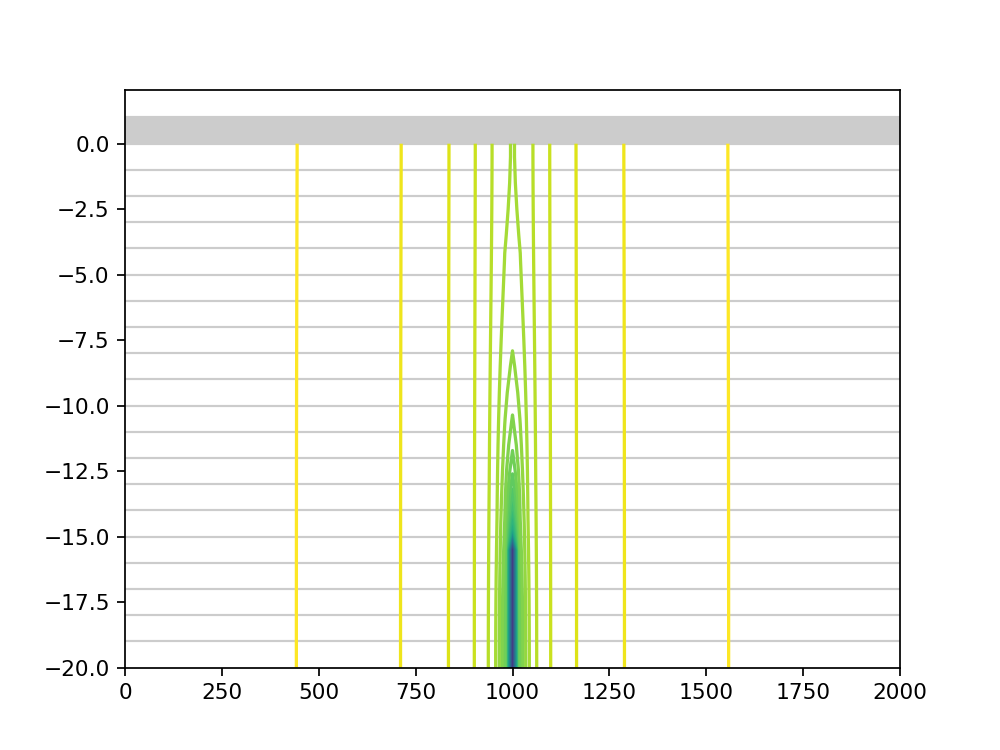

In [3]:
elevation = np.arange(0,-21,-1)
ml_2c = Model3D(kaq=20, z=elevation, kzoverkh=0.1, topboundary='semi', topres=1000, topthick=1, hstar=0)
well_2c = Well(ml_2c ,xw=0 ,yw=0 ,layers =np.arange(15,20,1),Qw = 1000, rw =0.3)
ml_2c.solve()
print(well_2c.headinside())
ml_2c.vcontour(win=[-1000,1000,0,0],n=101 ,levels=40)

#### Exercise 2d
Compute the head in the well when the well is screened in all 20 layers, in the bottom 19 layers, in the bottom 18 layers, ..., all the way to the bottom 2 layers, and the bottom layer. Plot the head in the well along the vertical axis vs. the elevation of the top of the well screen along the horizontal axis. How short must the well screen be before the partial penetration becomes significant?

In [10]:
'''
The partial penetration becomes significant when there is a lot of water entering the pipe,
which means water head inside the well is not sensitive.

From the graph, we can observe the elevation before -12.5m, not too much water flows into the pipe, hence the penetration becomes
less significant
'''

'\nThe partial penetration becomes significant when there is a lot of water entering the pipe,\nwhich means water head inside the well is not sensitive.\n\nFrom the graph, we can observe the elevation before -12.5m, not too much water flows into the pipe, hence the penetration becomes\nless significant\n'

In [5]:
hwell = np.zeros(20)
for i in range(20):
    ml = Model3D(kaq=20, z=np.linspace(20, 0, 21), topboundary='semi', topres=1000, topthick=2, hstar=0, kzoverkh=0.1)
    w = Well(ml, Qw=1000, layers=np.arange(i, 20), rw=0.3)
    ml.solve(silent=True)
    hwell[i] = w.headinside()[-1]
plt.figure()
plt.plot(-np.arange(20), hwell)
plt.xlabel('top of well screen (m)')
plt.ylabel('head inside the well (m)')

<IPython.core.display.Javascript object>

Text(0,0.5,'head inside the well (m)')

### Exercise 3. Larger model

Consider two river segments and two wells as shown below. All distances are given in meters. The river level is given at the beginning and end of each river segment. The transmissivity of the aquifer may be treated as constant and equal to $T=600$ m$^2$/day. The areal infiltration rate on the aquifer is 1 mm/d. The discharge of well 1 is 2000 m$^3$/d and the discharge of well 2 is 3000 m$^3$/d. The radius of both wells is 0.3 m.

![](aem_layout.png)

#### Exercise 3a
Create a model for steady flow in the aquifer. Specify a reference point (`Constant`) outside the area of interest such that the flow towards the river segments from outside the model area looks similar to the flow towards the river from inside the model area. Produce a contour plot of the head and label the contours. Compute and report the drawdowns at the two wells. 

Number of elements, Number of equations: 6 , 14
......
solution complete


<IPython.core.display.Javascript object>


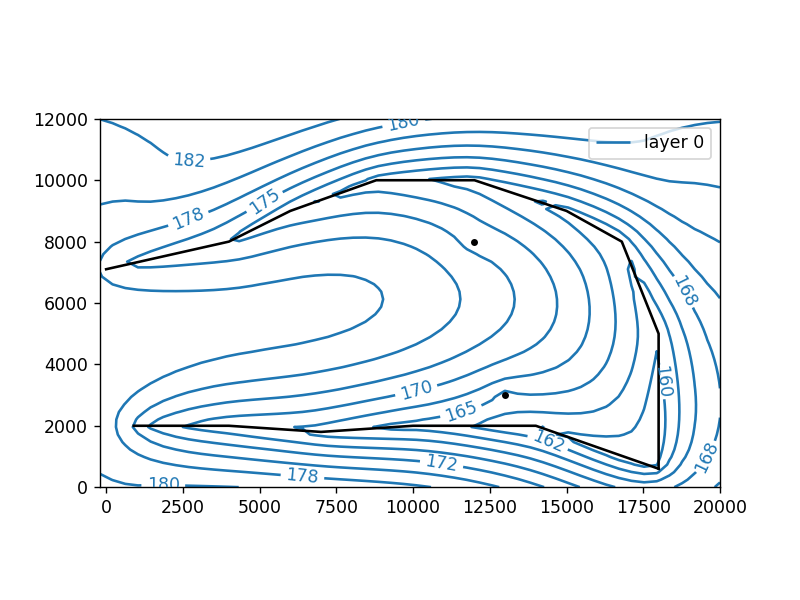

Number of elements, Number of equations: 4 , 14
....
solution complete
Drawdown at the well 1 is 5.05 meters
Drawdown at the well 2 is 7.18 meters


In [12]:
ml_3a = ModelMaq(kaq=20, z=[155,125])
rf_3a = Constant(ml_3a, xr= 22000, yr = 10000, hr = 176, layer = 0)
infiltration = CircAreaSink(ml_3a, xc= 10000,yc= 5000, R= 10000, N= 0.001, layer= 0)
w1_3a = Well(ml_3a, xw= 12000, yw= 8000, Qw= 2000, rw= 0.3, layers= 0, label= 'well1')
w2_3a = Well(ml_3a, xw= 13000, yw= 3000, Qw= 3000, rw= 0.3, layers= 0, label= 'well2')
xy1 = [(0,7100),(4000,8000),(6000,9000),(8800,10000),(12000,10000),(15000,9000),(16800,8000),(18000,5000),(18000,600)]
hls1 = [175,157]
xy2 = [(900,2000),(4000,2000),(7000,1800),(10000,2000),(14000,2000),(18000,600)]
hls2 = [171,157]

ls1 = HeadLineSinkString(ml_3a, xy= xy1, hls= hls1, layers= 0)
ls2 = HeadLineSinkString(ml_3a, xy= xy2, hls= hls2, layers= 0)

ml_3a.solve()
ml_3a.contour(win= [-200,20000,0,12000], ngr= 50, levels = 10, labels= True)

# Head without well
ml_3a_nowell = ModelMaq(kaq=20, z=[155,125])
rf_3a_nowell = Constant(ml_3a_nowell, xr= 22000, yr = 10000, hr = 176, layer = 0)
infiltration = CircAreaSink(ml_3a_nowell, xc= 10000,yc= 5000, R= 10000, N= 0.001, layer= 0)

ls1_nowell = HeadLineSinkString(ml_3a_nowell, xy= xy1, hls= hls1, layers= 0)
ls2_nowell = HeadLineSinkString(ml_3a_nowell, xy= xy2, hls= hls2, layers= 0)

ml_3a_nowell.solve()

print('Drawdown at the well 1 is %.2f meters'%(-(w1_3a.headinside()-ml_3a_nowell.head(12000,8000))))
print('Drawdown at the well 2 is %.2f meters'%(-(w2_3a.headinside()-ml_3a_nowell.head(13000,3000))))

#### Exercise 3b
Three head measurements are given in the table below (for the situation with the wells pumping). Determine and report the optimal value of the transmissivity of the aquifer using a least squares approach. Use a function from the `scipy.optimize` package.

| x (m) | y (m) | h (m) |
|------:|------:|------:|
| 7500  | 4000  | 176.82|
|15000  | 3000  | 163.02|
|10000  | 6000  | 175.38|

In [31]:
from scipy import optimize
def Head(xdata,T):
    ml_3b = ModelMaq(kaq=T/30, z=[155,125])
    rf_3b = Constant(ml_3b, xr= 22000, yr = 10000, hr = 176, layer = 0)
    infiltration = CircAreaSink(ml_3b, xc= 10000,yc= 5000, R= 10000, N= 0.001, layer= 0)
    w1_3b = Well(ml_3b, xw= 12000, yw= 8000, Qw= 2000, rw= 0.3, layers= 0, label= 'well1')
    w2_3b = Well(ml_3b, xw= 13000, yw= 3500, Qw= 3000, rw= 0.3, layers= 0, label= 'well2')
    xy1 = [(0,7100),(4000,8000),(6000,9000,),(8800,10000),(12000,10000),(15000,9000),(16800,8000),(18000,5000),(18000,600)]
    hls1 = [175,157]
    xy2 = [(900,2000),(4000,2000),(7000,1800),(10000,2000),(14000,2000),(18000,600)]
    hls2 = [171,157]
    ls1 = HeadLineSinkString(ml_3b, xy= xy1, hls= hls1, layers= 0)
    ls2 = HeadLineSinkString(ml_3b, xy= xy2, hls= hls2, layers= 0)
    ml_3b.solve(silent=True)
    h=np.zeros(len(xdata[0]))
    for i in range(len(xdata[0])):
        h[i] = ml_3b.head(xdata[0][i],xdata[1][i])
    return h

X = [7500, 15000, 10000]
Y = [4000, 3000, 6000]
H = [176.82, 163.02, 175.38]
xdata = [X,Y]
opt_T = optimize.curve_fit(Head, xdata, H)[0]
print('optimized Transmissivity is %.2f m^2/d' %(opt_T))



optimized Transmissivity is 624.39 m^2/d


**Implement of least_square without scipy package**

In [28]:
def Head(xdata,T):
    ml_3b = ModelMaq(kaq=T/30, z=[155,125])
    rf_3b = Constant(ml_3b, xr= 22000, yr = 10000, hr = 176, layer = 0)
    infiltration = CircAreaSink(ml_3b, xc= 10000,yc= 5000, R= 10000, N= 0.001, layer= 0)
    w1_3b = Well(ml_3b, xw= 12000, yw= 8000, Qw= 2000, rw= 0.3, layers= 0, label= 'well1')
    w2_3b = Well(ml_3b, xw= 13000, yw= 3500, Qw= 3000, rw= 0.3, layers= 0, label= 'well2')
    xy1 = [(0,7100),(4000,8000),(6000,9000,),(8800,10000),(12000,10000),(15000,9000),(16800,8000),(18000,5000),(18000,600)]
    hls1 = [175,157]
    xy2 = [(900,2000),(4000,2000),(7000,1800),(10000,2000),(14000,2000),(18000,600)]
    hls2 = [171,157]
    ls1 = HeadLineSinkString(ml_3b, xy= xy1, hls= hls1, layers= 0)
    ls2 = HeadLineSinkString(ml_3b, xy= xy2, hls= hls2, layers= 0)
    ml_3b.solve(silent=True)
    h=np.zeros(len(xdata[0]))
    for i in range(len(xdata[0])):
        h[i] = ml_3b.head(xdata[0][i],xdata[1][i])
    return h
T = np.arange(500,800,0.1)
X = [7500, 15000, 10000]
Y = [4000, 3000, 6000]
H = [176.82, 163.02, 175.38]
xdata = [X,Y]
def least_square(model, H):
    err=0
    for i in range(len(H)):
        err += (model[i]-H[i])**2
    return err
Trans = 0
err=1e6
for t in T:
    dif = least_square(Head(xdata,t), H)
    if dif <err:
        err = dif
        Trans = t

In [29]:
print('optimized Transmissivity is %.2f m^2/d' %(Trans))

optimized Transmissivity is 624.40 m^2/d


In [32]:
from scipy.optimize import leastsq
def model(p, x, y):
    ml = ModelMaq(kaq=p[0], z=[p[1], 0]) 
    rf = Constant(ml, xr=20000, yr=0, hr=155)
    cas = CircAreaSink(ml, xc=10000, yc=5000, R=12000, N=0.001)   
    ls1 = HeadLineSinkString(ml, xy=[(0, 7000), (4000, 8000), (6000, 9000),
                                     (9000, 10000), (12000, 10000), (15000, 9000),
                                     (17000, 8000), (18000, 5000), (18000, 500)],
                             hls=[175, 157])
    ls2 = HeadLineSinkString(ml, xy=[(1000, 2000), (4000, 2000), (7000, 1800),
                                     (10000, 2000), (14000, 2000), (18000, 500)],
                             hls=[171, 157])
    w1 = Well(ml, xw=12000, yw=8000, Qw=2000, rw=0.3, label='Well 1')
    w2 = Well(ml, xw=13000, yw=3000, Qw=3000, rw=0.3, label='Well 2')
    ml.solve(silent=True)
    return float(ml.head(x[0], y[0])), float(ml.head(x[1], y[1])), float(ml.head(x[2], y[2]))

def residuals(p, x, y, h):
    return model(p, x, y) - h

p0 = [30, 20]
x = np.array([7500, 15000, 10000])
y = np.array([4000, 3000, 6000])
h = np.array([176.82, 163.02, 175.38])

hlsq = leastsq(residuals, p0, args=(x, y, h))
k, H = hlsq[0]
T = k * H
print('the optimal transmissivity:', '%.2f' %T, 'm2/d')

the optimal transmissivity: 630.50 m2/d
